In [17]:
import torch
from torch.utils.data import DataLoader
from datasets import HDF5SpectrogramDataset
from .nf_training_script import train_model  
from .audio_image_pipeline import preprocess_to_hdf5
from .inference import load_nf_model, sample_from_flow
import matplotlib.pyplot as plt

### Loading Data

In [23]:
# asbolute path because i got in trouble
audio_folder = "/Users/koraygecimli/PycharmProjects/UDL_demo/wewantCNNs_project/data/nsynth-valid/audio"

# this is the path where we save our converted data
output_h5_path = "/Users/koraygecimli/PycharmProjects/UDL_demo/wewantCNNs_project/data/train_spectrograms_even.h5"

preprocess_to_hdf5(audio_folder, output_h5_path) # turns audio data into hdf5 data 

100%|██████████| 12678/12678 [01:00<00:00, 209.79it/s]

Preprocessed 12678 files to /Users/koraygecimli/PycharmProjects/UDL_demo/wewantCNNs_project/data/train_spectrograms_even.h5


### Training

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

train_data = HDF5SpectrogramDataset('/Users/koraygecimli/PycharmProjects/UDL_demo/wewantCNNs_project/data/train_spectrograms_even.h5')

train_loader = DataLoader( # again inspired by vae model 
    train_data,
    batch_size=32,  
    shuffle=True,
    pin_memory=True,
    num_workers=0,
    persistent_workers=False,
    prefetch_factor=None,
)

input_dim = train_data[0].numel()
trained_model = train_model(train_loader, input_dim=input_dim)

Using device: cpu
Epoch 1/20, Loss: -86984.0351
Checkpoint saved at epoch 1
Epoch 2/20, Loss: -89818.1605
Checkpoint saved at epoch 2
Epoch 3/20, Loss: -89838.4914
Checkpoint saved at epoch 3
Epoch 4/20, Loss: -89844.4751
Checkpoint saved at epoch 4
Epoch 5/20, Loss: -89847.0940
Checkpoint saved at epoch 5
Epoch 6/20, Loss: -89848.3866
Checkpoint saved at epoch 6
Epoch 7/20, Loss: -89848.5950
Checkpoint saved at epoch 7
Epoch 8/20, Loss: -89848.5957
Checkpoint saved at epoch 8
Epoch 9/20, Loss: -89848.5820
Epoch 10/20, Loss: -89848.5974
Checkpoint saved at epoch 10
Epoch 11/20, Loss: -89848.6133
Checkpoint saved at epoch 11
Epoch 12/20, Loss: -89848.5565
Epoch 13/20, Loss: -89848.6193
Checkpoint saved at epoch 13
Epoch 14/20, Loss: -89848.6191
Epoch 15/20, Loss: -89848.6191
Epoch 16/20, Loss: -89848.6140
Epoch 17/20, Loss: -89848.6194
Checkpoint saved at epoch 17
Epoch 18/20, Loss: -89848.6161
Epoch 19/20, Loss: -89848.6229
Checkpoint saved at epoch 19
Epoch 20/20, Loss: -89848.6246
Ch

### Generating new samples

Sample shape (flattened): torch.Size([1, 22016])


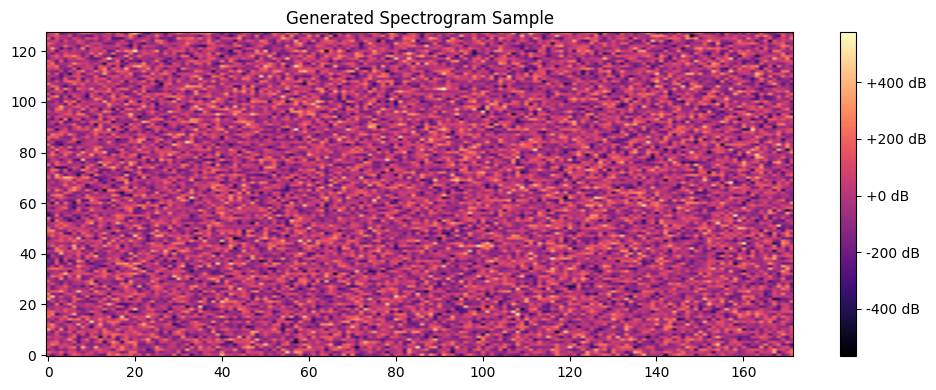

In [15]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
model, input_dim = load_nf_model(device)
sample = sample_from_flow(model, input_dim, device, batch_size=1)
print("Sample shape (flattened):", sample.shape)
spec = sample.view(128, 172).cpu().numpy()


plt.figure(figsize=(10, 4))
plt.imshow(spec, aspect='auto', cmap='magma', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title("Generated Spectrogram Sample")
plt.tight_layout()
plt.show()